## Data Analysis Project

***

## Project Description

Your boss has just acquired data about how much audiences and critics like movies as well as numerous other variables about the movies. This dataset is provided below, and it includes information from Rotten Tomatoes and IMDB for a random sample of movies.

She is interested in learning what attributes make a movie popular. She is also interested in learning something new about movies. She wants you team to figure it all out.

As part of this project you will complete exploratory data analysis (EDA), modeling, and prediction.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("movies.csv")

In [3]:
df

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,2008.0,10.0,28.0,5.9,8345,Rotten,44,Spilled,26,no,no,no,no,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/
647,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,1998.0,6.0,30.0,6.7,46794,Rotten,29,Upright,81,no,no,no,no,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/
648,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,2008.0,10.0,14.0,5.9,10087,Fresh,80,Spilled,52,no,no,no,no,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...
649,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,2004.0,11.0,2.0,5.8,66054,Rotten,31,Spilled,34,no,no,no,no,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             651 non-null    object 
 1   title_type        651 non-null    object 
 2   genre             651 non-null    object 
 3   runtime           650 non-null    float64
 4   mpaa_rating       651 non-null    object 
 5   studio            643 non-null    object 
 6   thtr_rel_year     651 non-null    int64  
 7   thtr_rel_month    651 non-null    int64  
 8   thtr_rel_day      651 non-null    int64  
 9   dvd_rel_year      643 non-null    float64
 10  dvd_rel_month     643 non-null    float64
 11  dvd_rel_day       643 non-null    float64
 12  imdb_rating       651 non-null    float64
 13  imdb_num_votes    651 non-null    int64  
 14  critics_rating    651 non-null    object 
 15  critics_score     651 non-null    int64  
 16  audience_rating   651 non-null    object 
 1

In [5]:
df.describe(include='all')

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
count,651,651,651,650.000000,651,643,651.000000,651.000000,651.000000,643.000000,643.000000,643.000000,651.000000,651.000000,651,651.000000,651,651.000000,651,651,651,651,651,651,649,649,644,642,638,636,651,651
unique,647,3,11,NaN,6,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2,NaN,2,2,2,2,2,2,532,485,572,601,607,615,650,650
top,Man on Wire,Feature Film,Drama,NaN,R,Paramount Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rotten,NaN,Upright,NaN,no,no,no,no,no,no,Oliver Stone,John Travolta,Diane Keaton,Gary Busey,Stephen Tobolowsky,Christina Applegate,http://www.imdb.com/title/tt1155592/,//www.rottentomatoes.com/m/man_on_wire/
freq,2,591,305,NaN,329,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307,NaN,376,NaN,629,644,558,579,608,636,4,7,5,3,3,2,2,2
mean,NaN,NaN,NaN,105.821538,NaN,NaN,1997.941628,6.740399,14.416283,2004.427683,6.332815,15.007776,6.493088,57532.983103,NaN,57.688172,NaN,62.362519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,19.445047,NaN,NaN,10.974501,3.554223,8.861167,4.643588,3.378228,8.867400,1.084747,112124.386910,NaN,28.402971,NaN,20.222624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,39.000000,NaN,NaN,1970.000000,1.000000,1.000000,1991.000000,1.000000,1.000000,1.900000,180.000000,NaN,1.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,92.000000,NaN,NaN,1990.000000,4.000000,7.000000,2001.000000,3.000000,7.000000,5.900000,4545.500000,NaN,33.000000,NaN,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,103.000000,NaN,NaN,2000.000000,7.000000,15.000000,2004.000000,6.000000,15.000000,6.600000,15116.000000,NaN,61.000000,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,115.750000,NaN,NaN,2007.000000,10.000000,21.000000,2008.000000,9.000000,23.000000,7.300000,58300.500000,NaN,83.000000,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['title', 'title_type', 'genre', 'runtime', 'mpaa_rating', 'studio', 'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day', 'imdb_rating', 'imdb_num_votes', 'critics_rating', 'critics_score', 'audience_rating', 'audience_score', 'best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win', 'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url'], dtype='object')

Research question: (3 points) Come up with a research question that you want to answer using these data and a multiple linear regression model. You should phrase your research question in a way that matches up with the scope of inference your dataset allows for. You are welcomed to create new variables based on existing ones. Along with your research question include a brief discussion (1-2 sentences) as to why this question is of interest to you and/or your audience.

What factors affect imdb rating?

In [7]:
df = df[['genre', 'runtime', 'mpaa_rating','imdb_rating', 'imdb_num_votes','critics_score','audience_score','top200_box']]

In [8]:
df.head()

,genre,runtime,mpaa_rating,imdb_rating,imdb_num_votes,critics_score,audience_score,top200_box
0,Drama,80.0,R,5.5,899,45,73,no
1,Drama,101.0,PG-13,7.3,12285,96,81,no
2,Comedy,84.0,R,7.6,22381,91,91,no
3,Drama,139.0,PG,7.2,35096,80,76,no
4,Horror,90.0,R,5.1,2386,33,27,no


### Groupby Function

In [9]:
df.groupby("genre")["imdb_rating"].mean()

genre
Action & Adventure           5.970769
Animation                    5.900000
Art House & International    6.614286
Comedy                       5.744828
Documentary                  7.648077
Drama                        6.673443
Horror                       5.760870
Musical & Performing Arts    7.300000
Mystery & Suspense           6.479661
Other                        6.631250
Science Fiction & Fantasy    5.755556
Name: imdb_rating, dtype: float64

In [10]:
df.groupby("mpaa_rating")["imdb_rating"].mean()

mpaa_rating
G          6.663158
NC-17      6.700000
PG         6.355085
PG-13      6.181203
R          6.522188
Unrated    7.384000
Name: imdb_rating, dtype: float64

In [11]:
df.groupby("top200_box")["imdb_rating"].mean()

top200_box
no     6.47783
yes    7.14000
Name: imdb_rating, dtype: float64

## Data Visualization

### Univariate Data Exploration

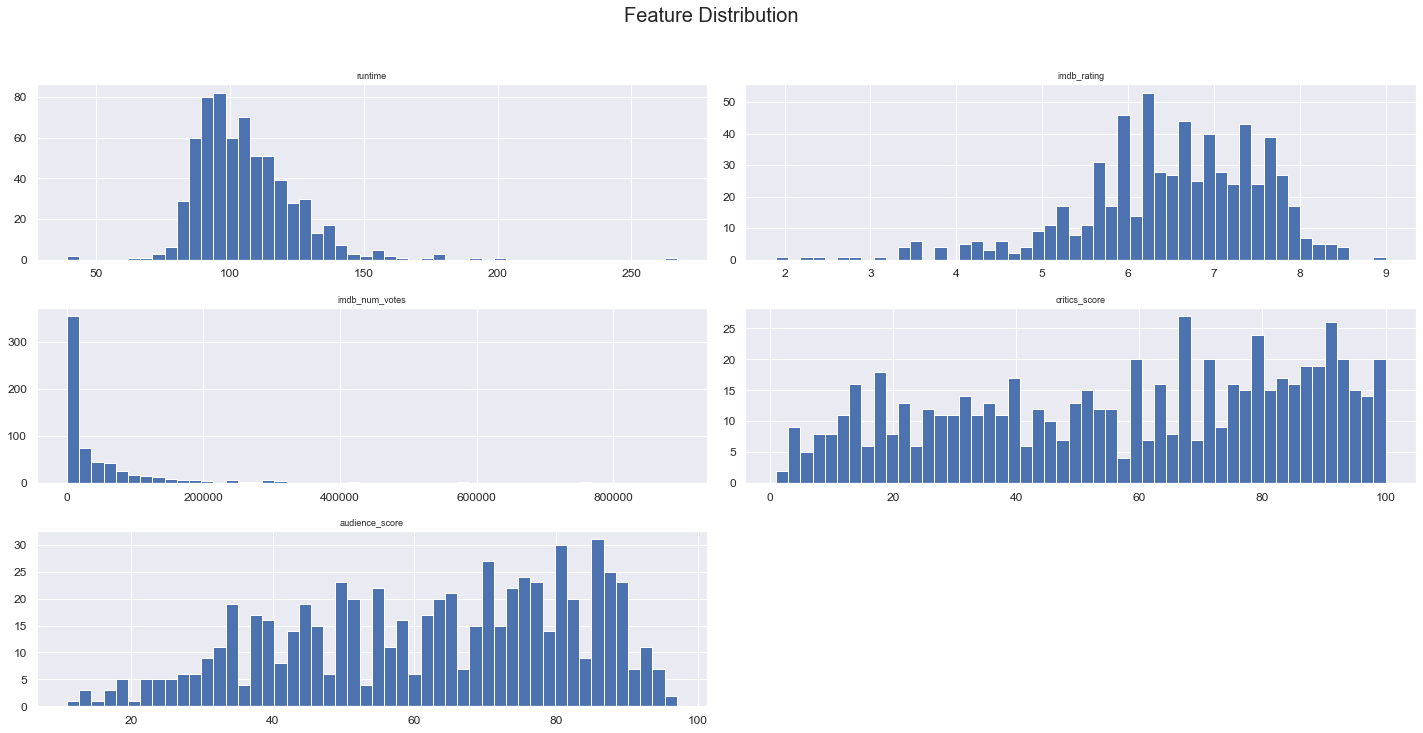

In [12]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

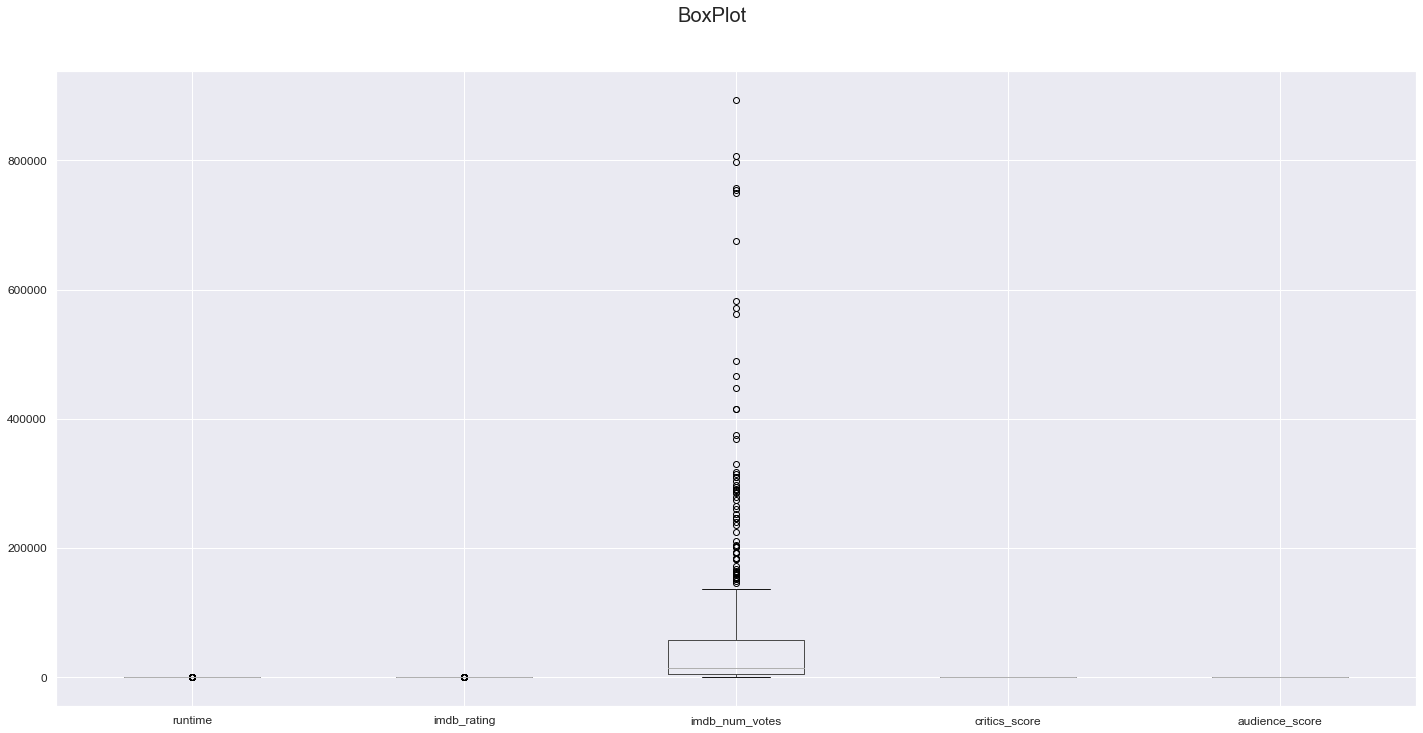

In [13]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

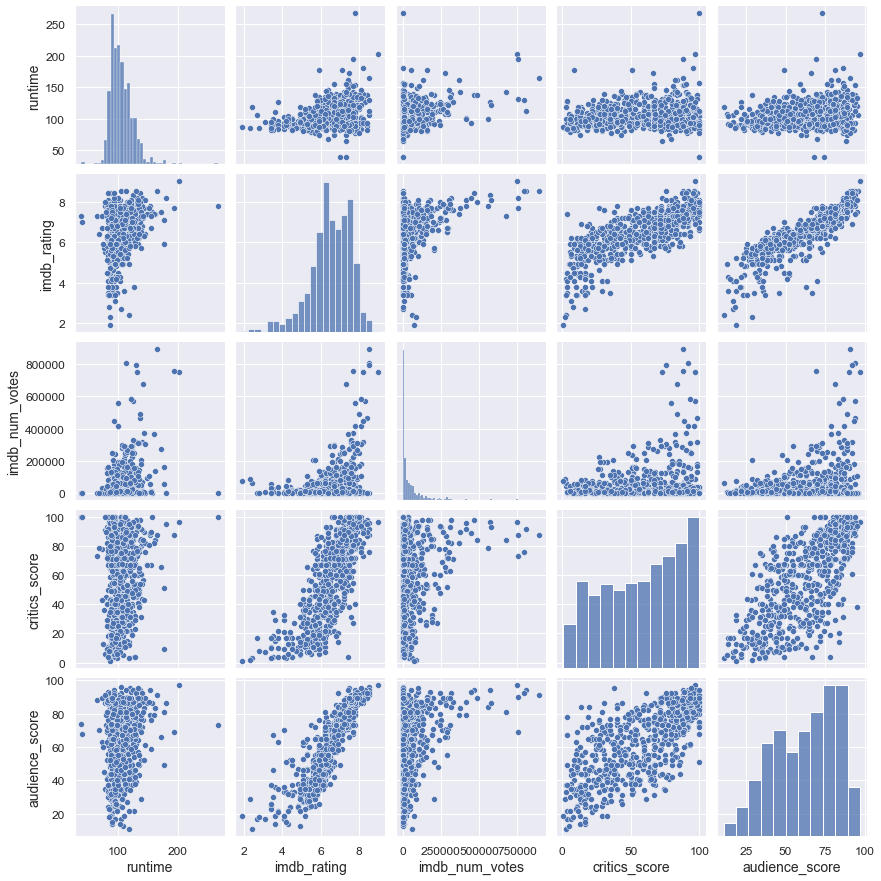

In [14]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df)
plt.show()

### Regression plot

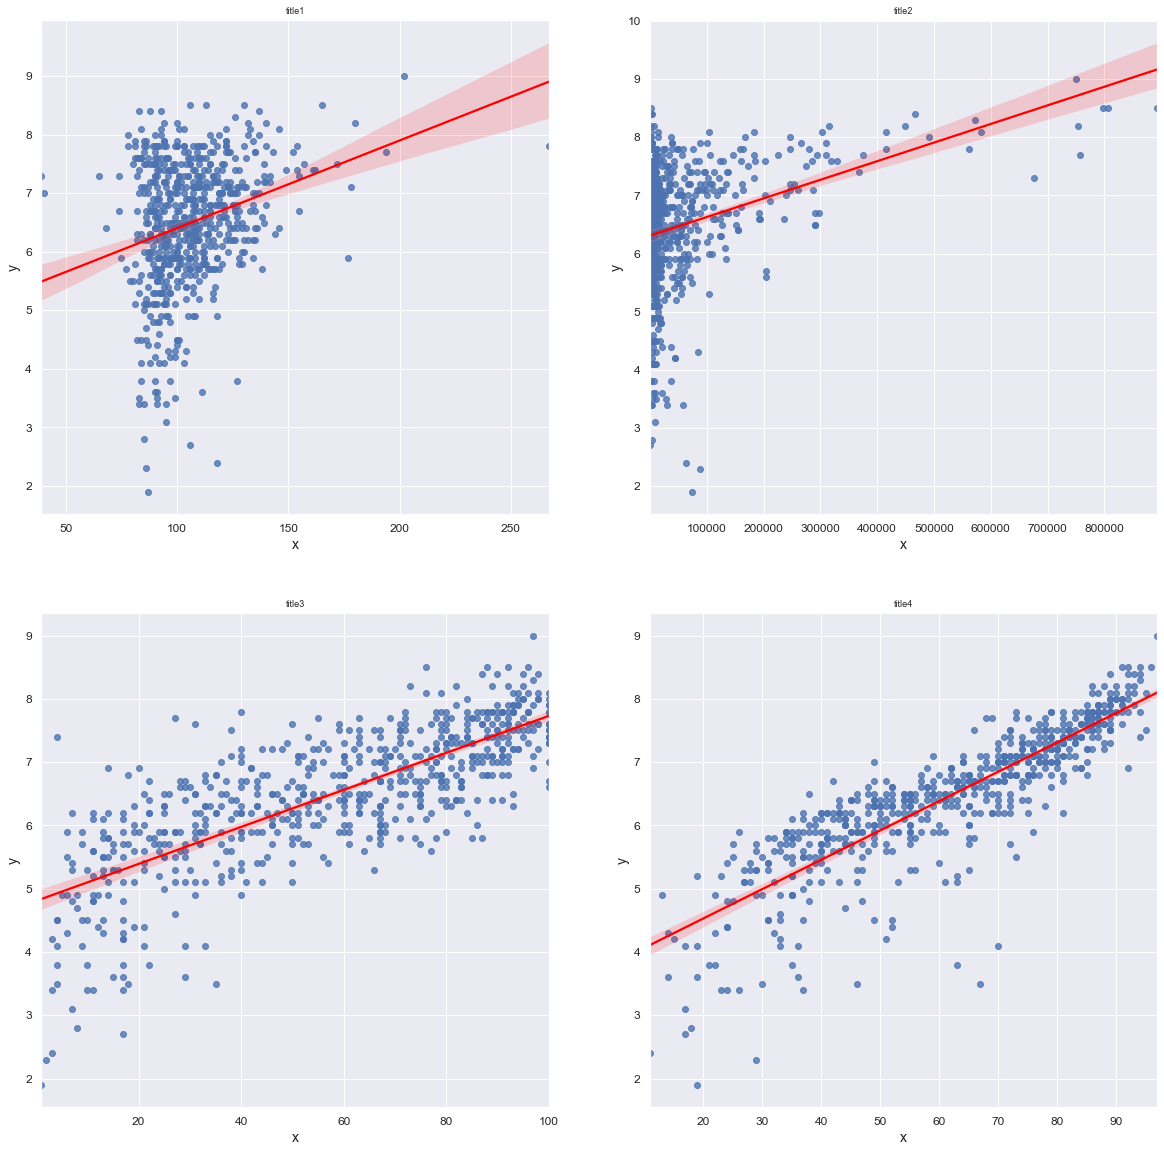

In [15]:
line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

#

ax1 = sns.regplot(x=df.runtime, y=df.imdb_rating, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("title1")


#

ax2 = sns.regplot(x=df.imdb_num_votes, y=df.imdb_rating, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("title2")


#

ax3 = sns.regplot(x=df.critics_score, y=df.imdb_rating, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("title3")

#

ax4 = sns.regplot(x=df.audience_score, y=df.imdb_rating, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("title4")

plt.show()

### Correlation

In [16]:
df.corr()

,runtime,imdb_rating,imdb_num_votes,critics_score,audience_score
runtime,1.000000,0.268240,0.347215,0.172499,0.180963
imdb_rating,0.268240,1.000000,0.331152,0.765036,0.864865
imdb_num_votes,0.347215,0.331152,1.000000,0.209251,0.289813
critics_score,0.172499,0.765036,0.209251,1.000000,0.704276
audience_score,0.180963,0.864865,0.289813,0.704276,1.000000


In [17]:
df.corr()["imdb_rating"].sort_values()

runtime           0.268240
imdb_num_votes    0.331152
critics_score     0.765036
audience_score    0.864865
imdb_rating       1.000000
Name: imdb_rating, dtype: float64

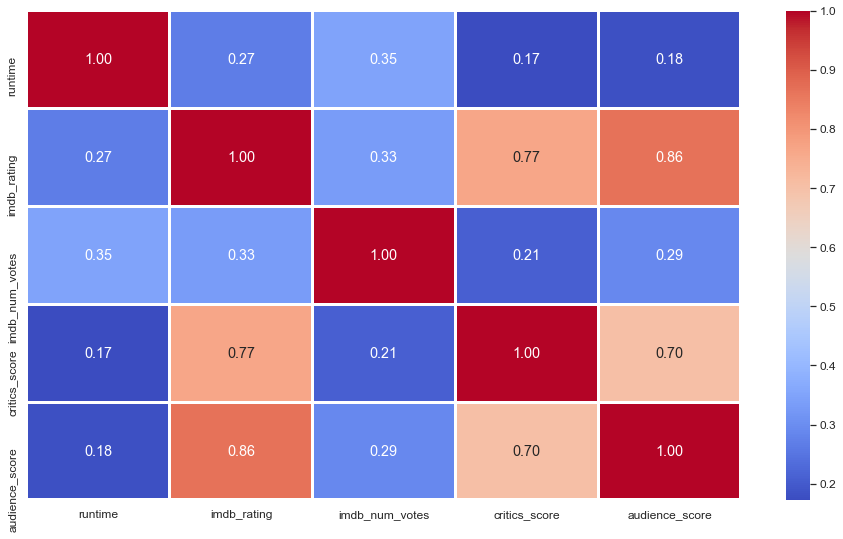

In [18]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

### One-hot encoding

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre           651 non-null    object 
 1   runtime         650 non-null    float64
 2   mpaa_rating     651 non-null    object 
 3   imdb_rating     651 non-null    float64
 4   imdb_num_votes  651 non-null    int64  
 5   critics_score   651 non-null    int64  
 6   audience_score  651 non-null    int64  
 7   top200_box      651 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 40.8+ KB


In [20]:
df2 = pd.get_dummies(data=df,drop_first=True)

In [21]:
df2

,runtime,imdb_rating,imdb_num_votes,critics_score,audience_score,genre_Animation,genre_Art House & International,genre_Comedy,genre_Documentary,genre_Drama,genre_Horror,genre_Musical & Performing Arts,genre_Mystery & Suspense,genre_Other,genre_Science Fiction & Fantasy,mpaa_rating_NC-17,mpaa_rating_PG,mpaa_rating_PG-13,mpaa_rating_R,mpaa_rating_Unrated,top200_box_yes
0,80.0,5.5,899,45,73,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,101.0,7.3,12285,96,81,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,84.0,7.6,22381,91,91,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,139.0,7.2,35096,80,76,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,90.0,5.1,2386,33,27,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,97.0,5.9,8345,44,26,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
647,82.0,6.7,46794,29,81,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
648,87.0,5.9,10087,80,52,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
649,120.0,5.8,66054,31,34,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [22]:
df2.isnull().sum()

runtime                            1
imdb_rating                        0
imdb_num_votes                     0
critics_score                      0
audience_score                     0
genre_Animation                    0
genre_Art House & International    0
genre_Comedy                       0
genre_Documentary                  0
genre_Drama                        0
genre_Horror                       0
genre_Musical & Performing Arts    0
genre_Mystery & Suspense           0
genre_Other                        0
genre_Science Fiction & Fantasy    0
mpaa_rating_NC-17                  0
mpaa_rating_PG                     0
mpaa_rating_PG-13                  0
mpaa_rating_R                      0
mpaa_rating_Unrated                0
top200_box_yes                     0
dtype: int64

In [23]:
df2.dropna(inplace=True)

Modeling: (20 points) Develop a multiple linear regression model to predict a numerical variable in the dataset. The response variable and the explanatory variables can be existing variables in the dataset, or new variables you create based on existing variables.

## Regression Analysis

In [24]:
df2.columns

Index(['runtime', 'imdb_rating', 'imdb_num_votes', 'critics_score', 'audience_score', 'genre_Animation', 'genre_Art House & International', 'genre_Comedy', 'genre_Documentary', 'genre_Drama', 'genre_Horror', 'genre_Musical & Performing Arts', 'genre_Mystery & Suspense', 'genre_Other', 'genre_Science Fiction & Fantasy', 'mpaa_rating_NC-17', 'mpaa_rating_PG', 'mpaa_rating_PG-13', 'mpaa_rating_R', 'mpaa_rating_Unrated', 'top200_box_yes'], dtype='object')

In [25]:
y = df2['imdb_rating']
X = df2[['runtime','imdb_num_votes', 'critics_score', 'audience_score','top200_box_yes']]

In [26]:
X = sm.add_constant(X)

In [27]:
model = sm.OLS(y,X).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     547.9
Date:                Tue, 30 Mar 2021   Prob (F-statistic):          3.18e-229
Time:                        15:28:27   Log-Likelihood:                -435.57
No. Observations:                 650   AIC:                             883.1
Df Residuals:                     644   BIC:                             910.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.2248      0.118     27.434      0.000       2.994       3.456
runtime            0.0047      0.001      4.558      0.000       0.003       0.007
imdb_num_votes  6.478e-07   1.89e-07      3.425      0.001    2.76e-07    1.02e-06
critics_score      0.0115      0.001     12.446      0.000       0.010       0.013
audience_score     0.0332      0.001     25.041      0.000       0.031       0.036
top200_box_yes    -0.1842      0.130     -1.418      0.157      -0.439       0.071
==============================================================================
Omnibus:                      214.809   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              941.501
Skew:                          -1.451   Prob(JB):                    3.59e-205
Kurtosis:                       8.132   Cond. No.                     8.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Prediction: (5 points) Pick a movie from 2016 (a new movie that is not in the sample) and do a prediction for this movie using your the model you developed and the `predict` function in R. Also quantify the uncertainty around this prediction using an appropriate interval.

In [29]:
test = np.array([[0,120.0,10000, 75.0, 96.0,0]])

In [30]:
test.shape

(1, 6)

In [31]:
prediction = model.predict(test)

In [32]:
prediction

array([4.62510902])

### Residual Plots

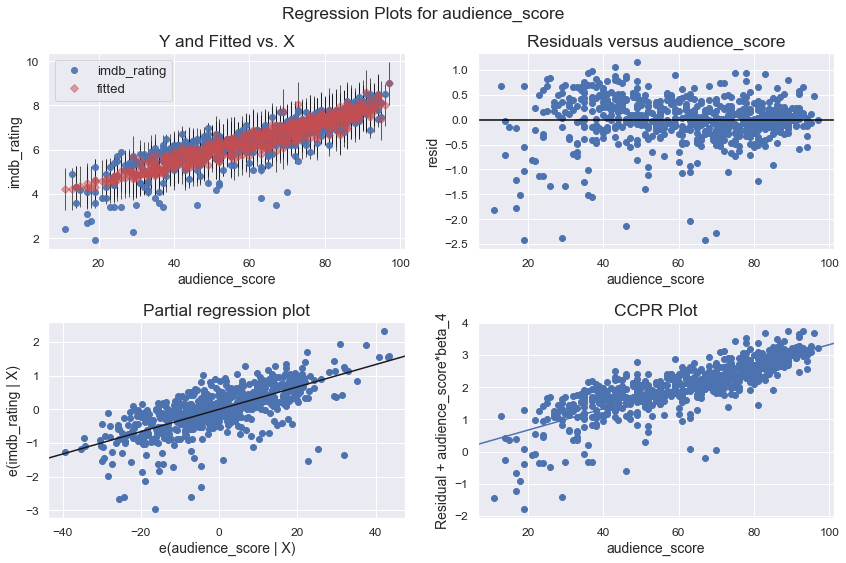

In [33]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'audience_score', fig=fig)

#### Python code done by Dennis Lam